# Discriminative VS generative models

Let's consider a __classification task__:

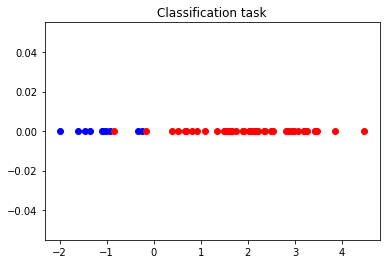

In [1]:
from matplotlib import pyplot as plt
# %matplotlib notebook
import numpy as np
from numpy.random import normal as randn

# Unbalanced classification problem:
x1 = randn(size=(10,))/2-1
x2 = randn(size=(50,))+2
plt.scatter(x1,np.zeros(x1.shape),c='b')
plt.scatter(x2,np.zeros(x2.shape),c='r')
plt.title('Classification task')
plt.show();

In the probabilistic framework, this problem can be faced at least in 2 ways:

- discriminative: given the data find the __labels probability__;
- generative: given a label __how much likely__ are the data?

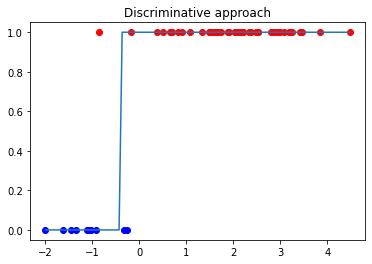

In [2]:
from sklearn.linear_model import LogisticRegression

# Discriminative model:
samples = np.concatenate([x1,x2]).reshape(-1,1)
classification = np.concatenate([np.zeros(x1.shape), np.ones(x2.shape)])
model = LogisticRegression().fit(samples,classification)

plt.scatter(x1,np.zeros(x1.shape),c='b')
plt.scatter(x2,np.ones(x2.shape),c='r')
x = np.linspace(min(samples),max(samples),100)
plt.plot(x,model.predict(x))
plt.title('Discriminative approach')
plt.show()

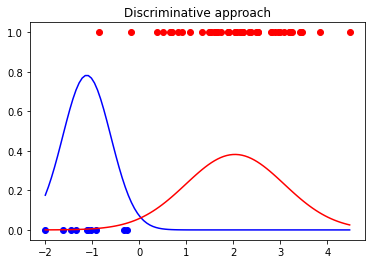

In [3]:
from scipy.stats import norm

# Generative model:
mu1 = x1.mean()
sigma1 = x1.std()
mu2 = x2.mean()
sigma2 = x2.std()


plt.scatter(x1,np.zeros(x1.shape),c='b')
plt.plot(x,norm.pdf(x,mu1,sigma1),c='b')
plt.scatter(x2,np.ones(x2.shape),c='r')
plt.plot(x,norm.pdf(x,mu2,sigma2),c='r')
plt.title('Discriminative approach')
plt.show()

## Latent variables

Assume the labels $h$ describe the structure of data:
    
> __consider $h$ as unobservable random variables (hidden causes) inducing observable outcomes $x$__

Inference of the hidden variables $h$ given the outcome $x$, by chain rule the following are equivalent:

$$\large
p(h|x)p(x) = p(x|h)p(h)
$$

This means that given $x$ we can estimate $h$ directly with: $\large p(h|x)$.

Another possibility is to estimate $h$ by:

- maximizing the posterior $\large p(x|h)p(h)$;
- maximizing the likelihood of data $\large p(x|h)$ (if $p(h)$ is uninformative).

The two expressions can be represented as graphical models as follows:

<IPython.core.display.Latex object>

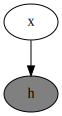

<IPython.core.display.Latex object>

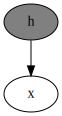

In [4]:
from visualization import graph

base = "h[style=filled,fillcolor=gray]\n"
graph(f"{base}x->h", title="Direct modeling: $\large arg\max_hp(h|x)p(x)$")
graph(f"{base}h->x", title="A-posteriori estimation maximizing: $\large arg\max_hp(x|h)p(h)$")

In the latter case no $p(x)$ must be estimated, generally being that pdf the intractable one.

## Direct $p(h|x)$ estimation: discriminative models

Naive Bayes: $\large p(h|x)=\prod_i{p(h_i|x)}$

We can estimate the (simpler) $p(h_i|x)$ (eg. in tabular form).

Given an $x$, choose the combination of $h_i$ maximizing $p(h|x)$.

Practical example: classification (only one $h_i$ to 1, the remaining to 0).

__This approach allows discrimination only__

## Maximum likelihood $p(x|h)$ estimation: generative models

PPCA: $\large x = Wh + \mu + \sigma$  
where $\sigma \sim \mathcal{N}$

A stochastic recipe to compute $x$ given $h$ is defined by the model.

__This approach allows both discrimination and generation__.

## Example: PCA on faces

In [5]:
import numpy as np
import pandas as pd

# Load data (from https://github.com/daradecic/Python-Eigenfaces):
faces = pd.read_csv('data/face_data.csv.gz')
faces = faces.drop('target',axis=1)
faces = np.array(faces)

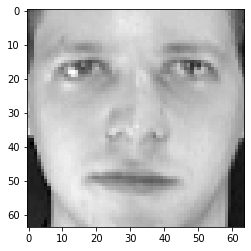

In [6]:
from matplotlib import pyplot as plt

def plot_face(face):
    plt.figure()
    plt.imshow(face.reshape(64, 64), cmap='gray')
    plt.show()

plot_face(faces[0])

In [10]:
from sklearn.decomposition import PCA

# Computing the PCA of images:
pca = PCA(n_components=100).fit(faces)
latent = pca.transform(faces)

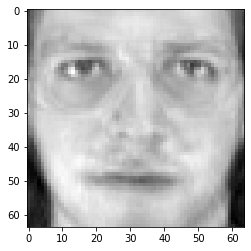

In [11]:
# Reconstructing a face:
def reconstruct_face(latent):
    return pca.inverse_transform(latent)

def plot_reconstructed_face(latent):
    plot_face(reconstruct_face(latent))

plot_reconstructed_face(latent[0])

In [13]:
from visualization import interact_vector

# Synthesis of new faces:
def plot_new_face(v):
    # Mean and modified face:
    n = latent.shape[1]
    h = np.zeros((n,))
    f_mean = reconstruct_face(h)
    h[0:len(v)] = v
    f_mod = reconstruct_face(h)
    
    # Plotting both:
    _, axes = plt.subplots(1, 2, figsize=(8, 16))
    fs = [f_mean,f_mod]
    for i in range(2):
        axes[i].imshow(fs[i].reshape(64, 64), cmap='gray')
    plt.show()
    print("v:",h)

# Interactive face reconstruction:
interact_vector("v", 10, plot_new_face, min=-10, max=10, step=1);

interactive(children=(FloatSlider(value=0.0, description='v0', max=10.0, min=-10.0, step=1.0), FloatSlider(val…